                Catalyst  Ratio of CH4 in Feed  Reaction Temperature  \
0            Ni−SiO2‑550                  0.15                 650.0   
1            Ni−SiO2‑750                  0.15                 650.0   
2      Ni/Sn0.2−SiO2‑550                  0.15                 650.0   
3      Ni/Sn0.2−SiO2‑750                  0.15                 650.0   
4     Ni/Sn0.05−SiO2‑550                  0.15                 650.0   
...                  ...                   ...                   ...   
1709              Ni-IMP                  0.50                 750.0   
1710            Ni/CZ100                  0.50                 700.0   
1711             Ni/CZ75                  0.50                 700.0   
1712             Ni/CZ44                  0.50                 700.0   
1713             Ni/CZ28                  0.50                 700.0   

      Ni Loading  Reaction Time  Pore Size  Pore Volume  Surface Area  \
0          10.00            0.5        4.7         0.58       

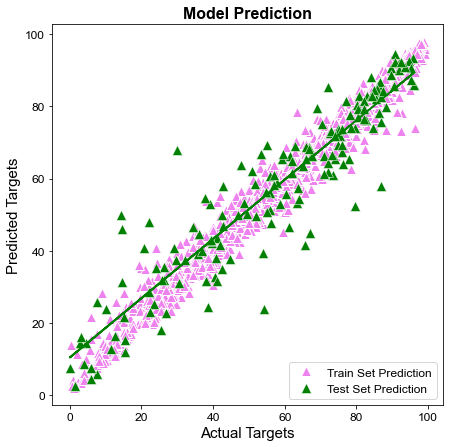

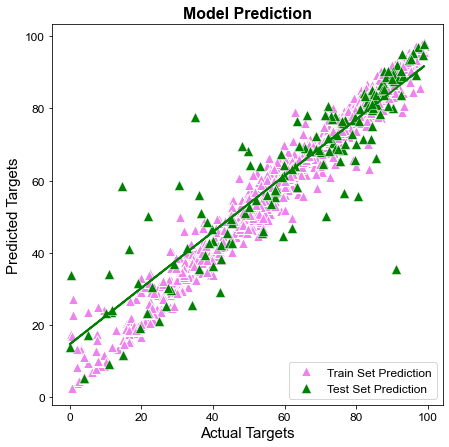

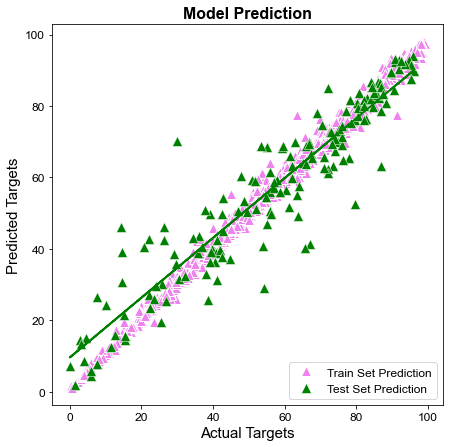

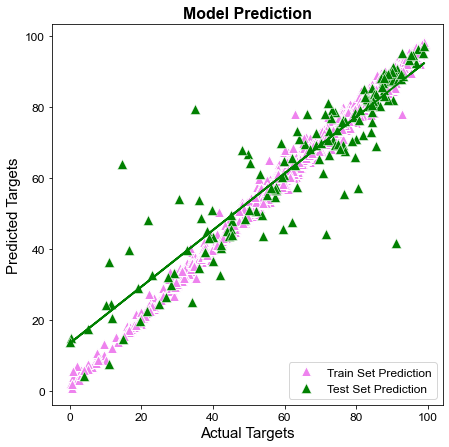

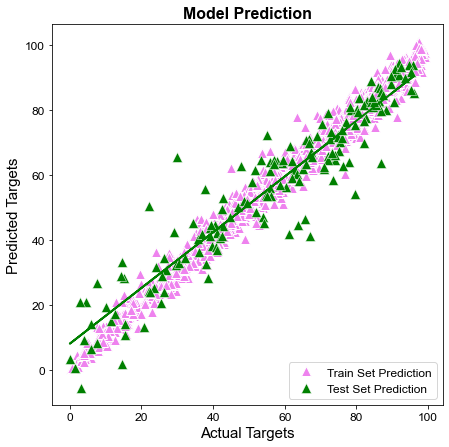

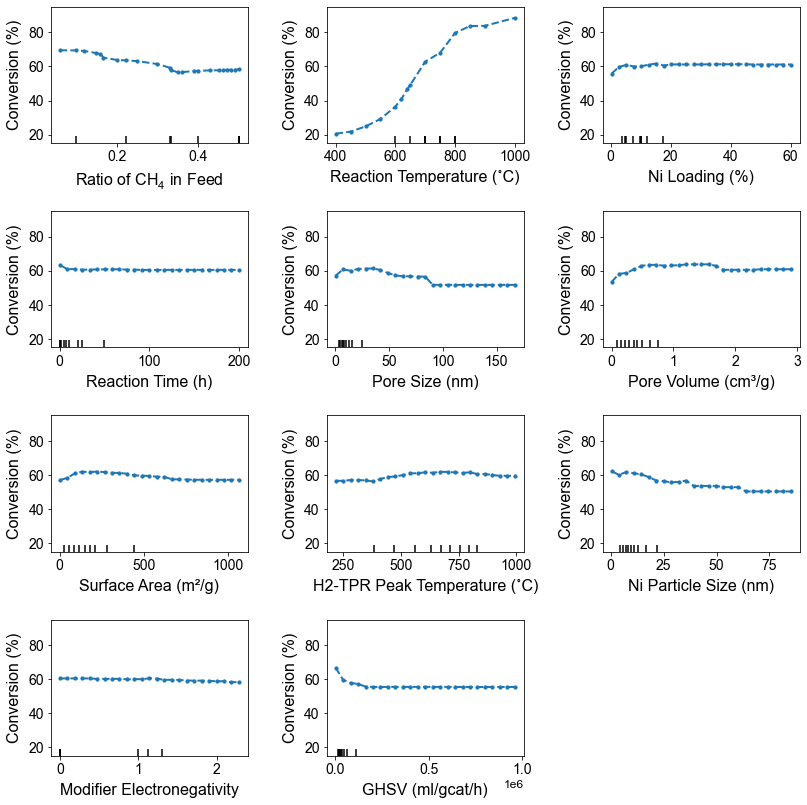

Time taken for one way pdp is 3.71 seconds


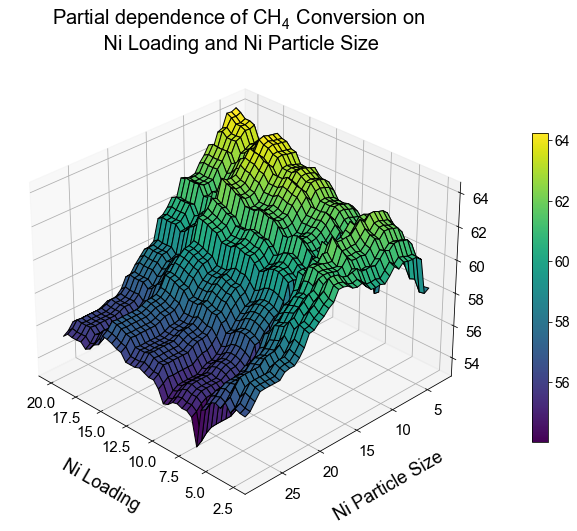

Time taken for 1st two way pdp is 6.65 seconds


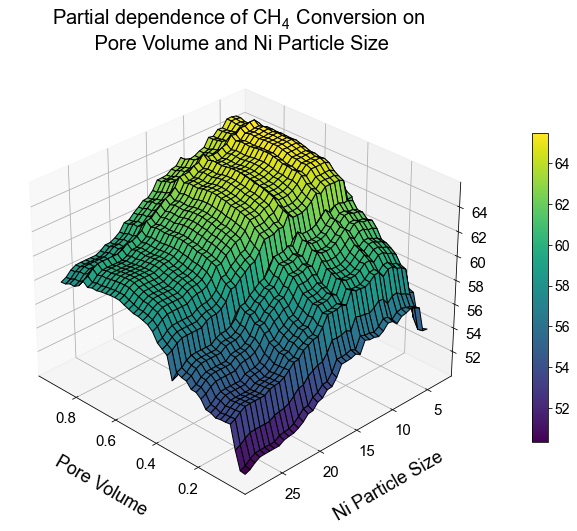

Time taken for 1st two way pdp is 7.24 seconds


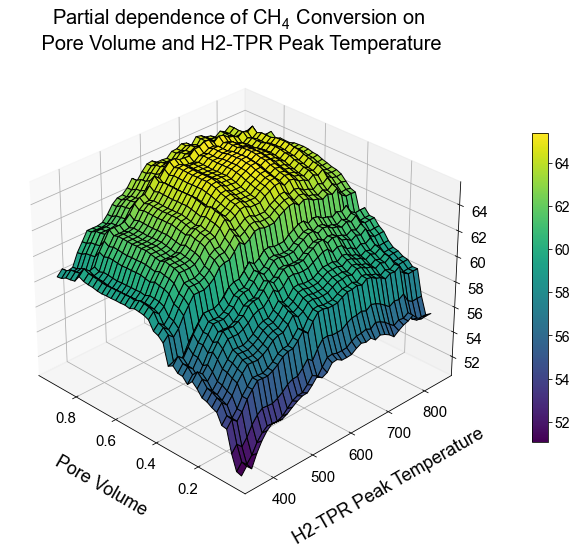

Time taken for 1st two way pdp is 7.15 seconds


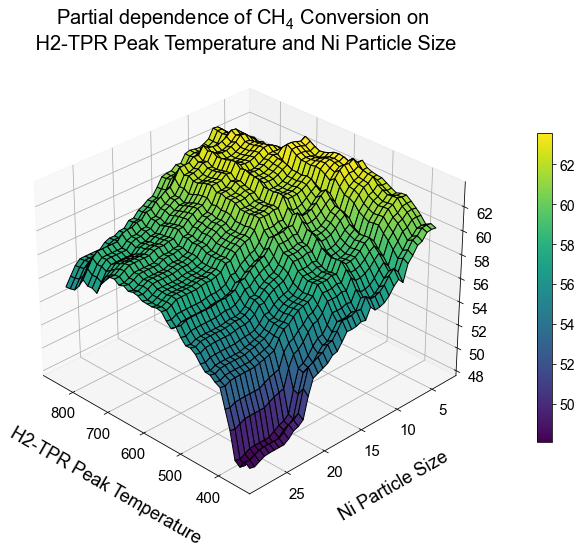

Time taken for 1st two way pdp is 7.19 seconds


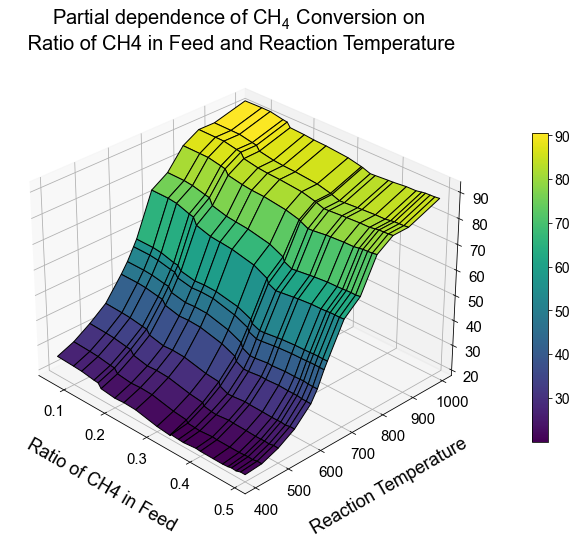

Time taken for 1st two way pdp is 1.61 seconds


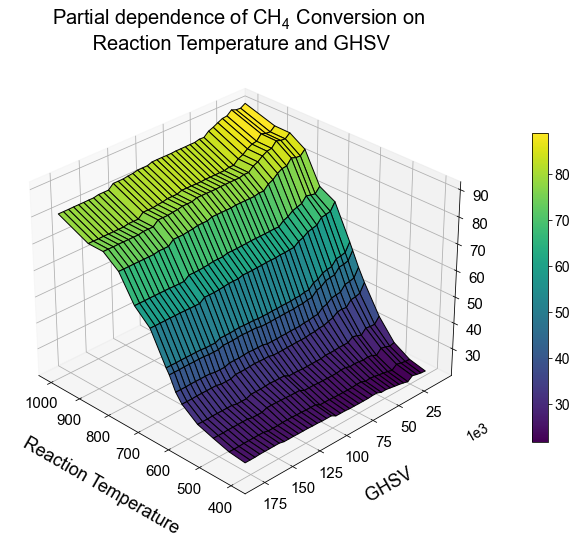

Time taken for 1st two way pdp is 2.65 seconds


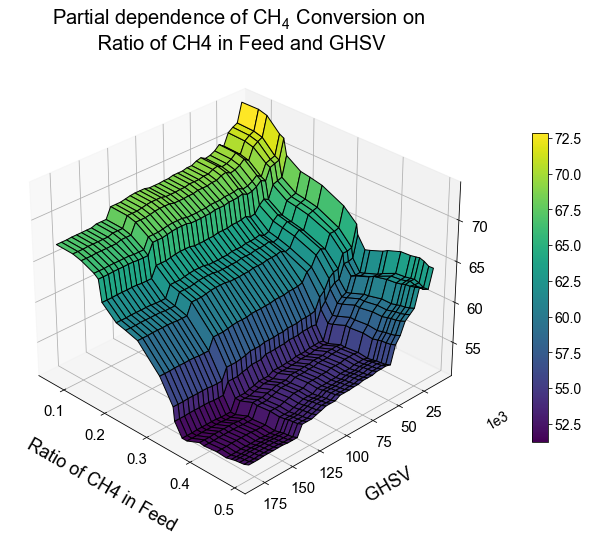

Time taken for 1st two way pdp is 4.11 seconds


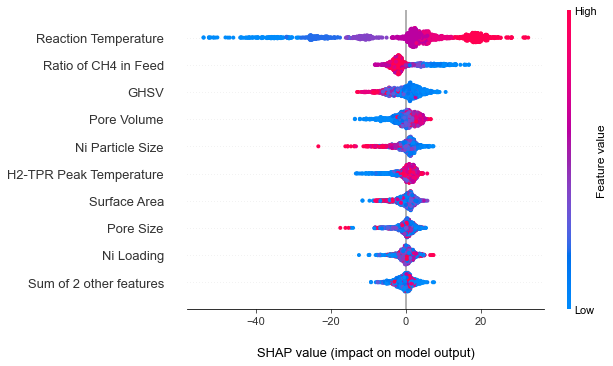

0.8945318410128082


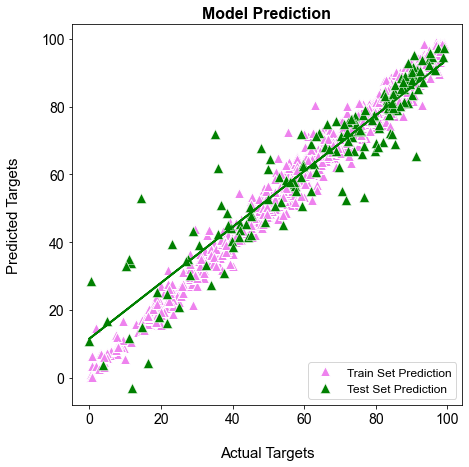

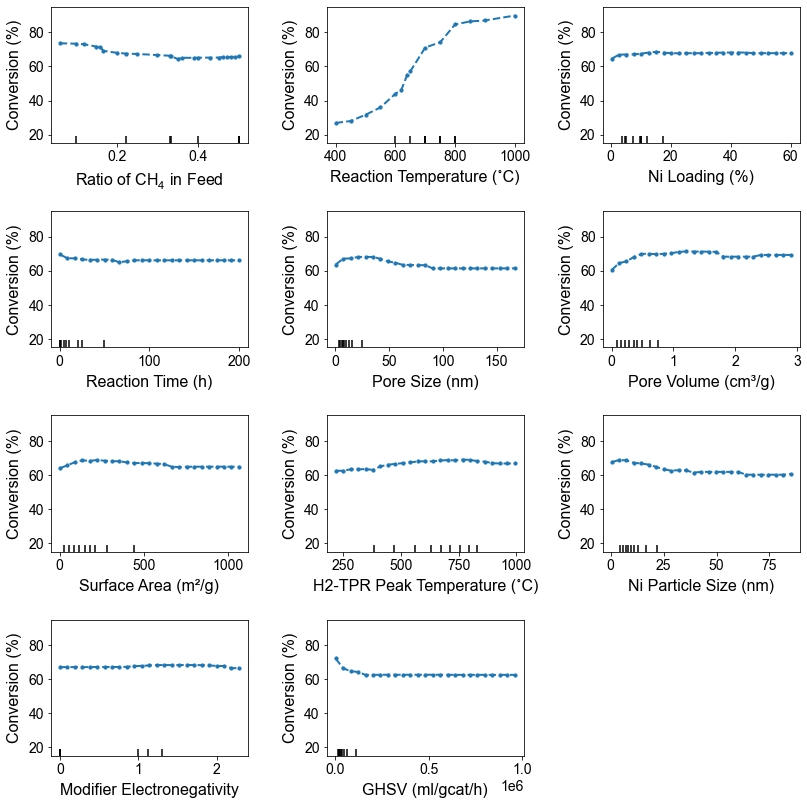

Time taken for one way pdp is 1.51 seconds


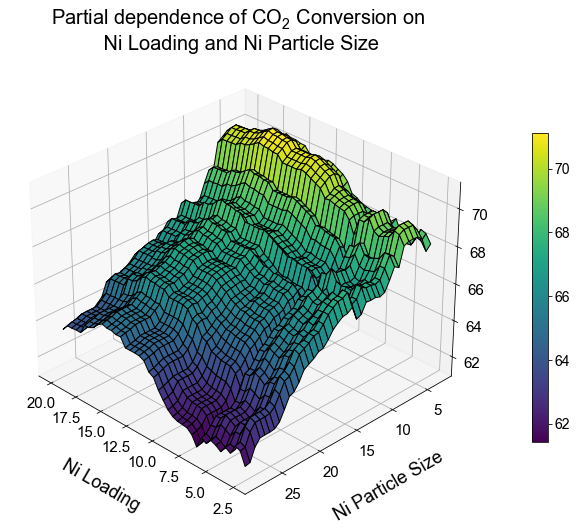

Time taken for 1st two way pdp is 6.94 seconds


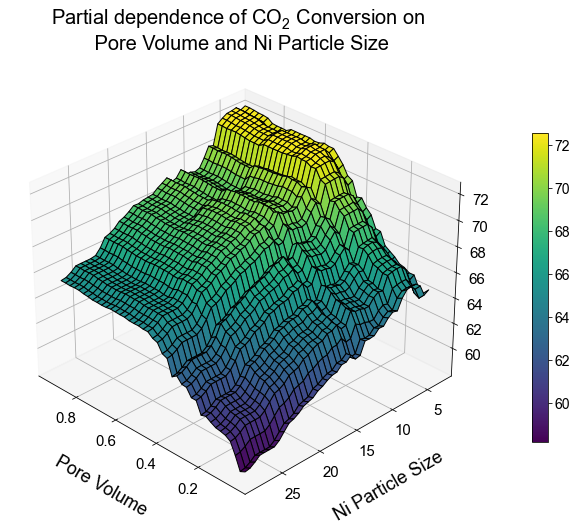

Time taken for 1st two way pdp is 7.07 seconds


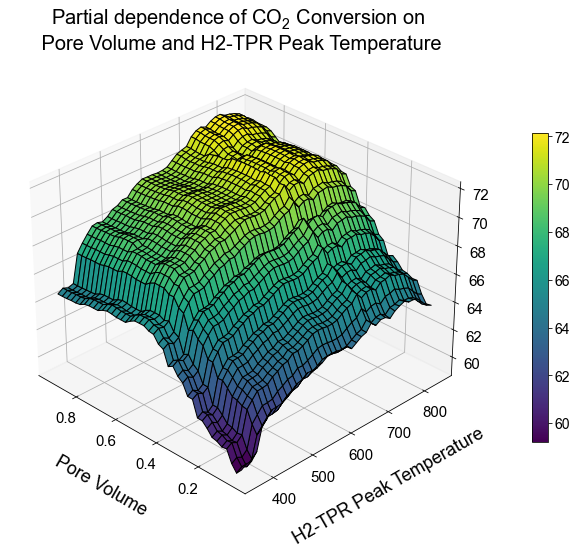

Time taken for 1st two way pdp is 6.83 seconds


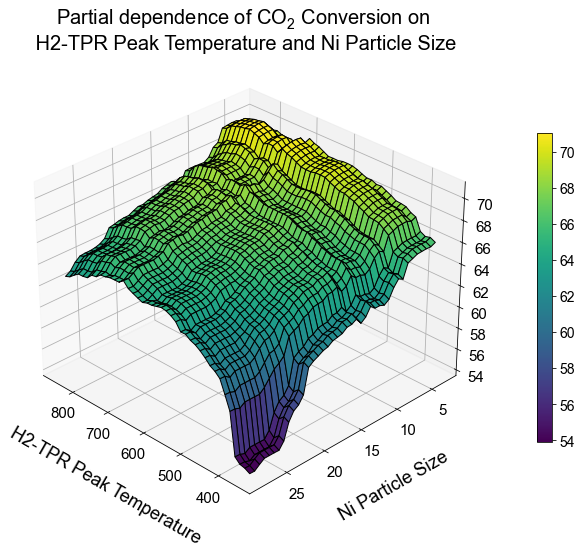

Time taken for 1st two way pdp is 6.98 seconds


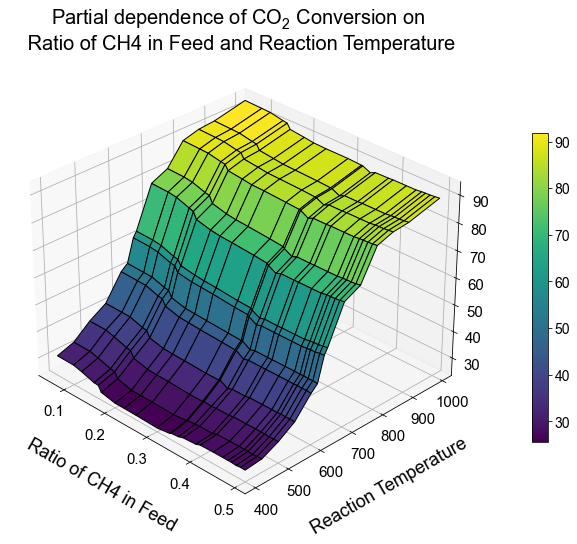

Time taken for 1st two way pdp is 1.84 seconds


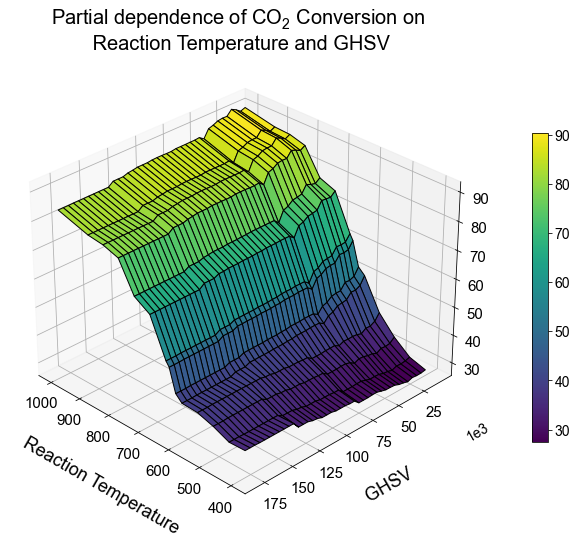

Time taken for 1st two way pdp is 2.74 seconds


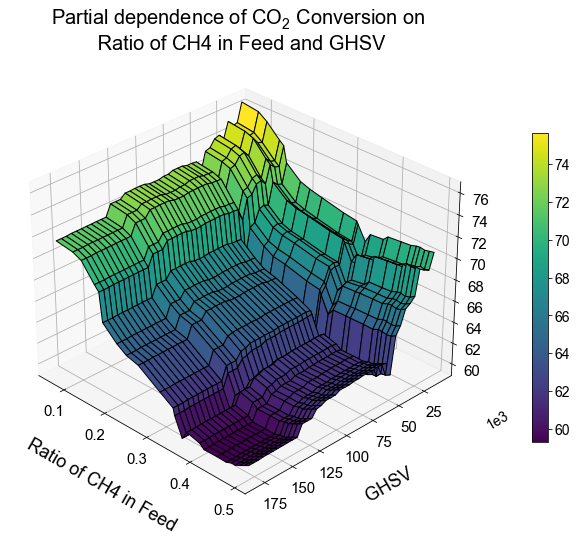

Time taken for 1st two way pdp is 4.22 seconds


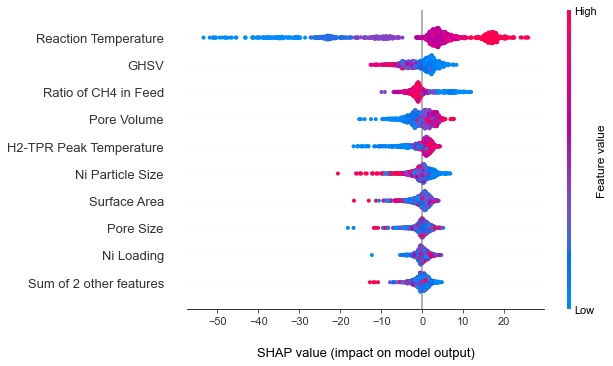

0.8753789424092022
0.8945318410128082
0.8753789424092022


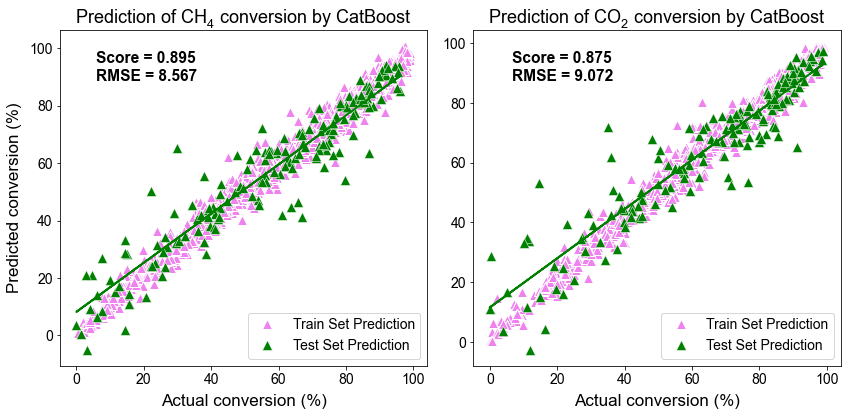

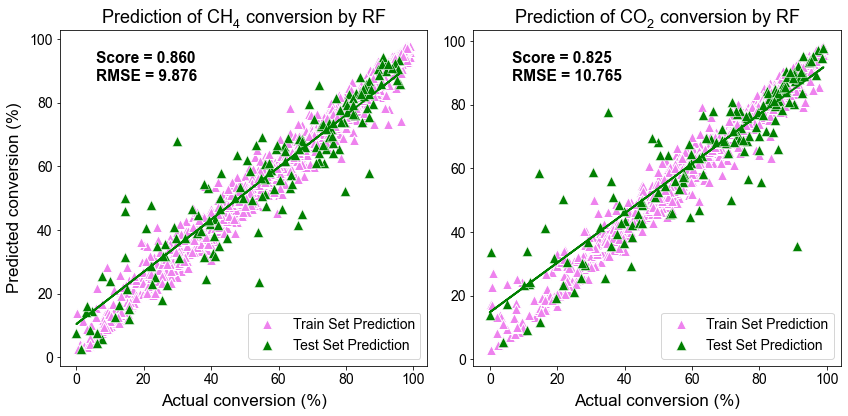

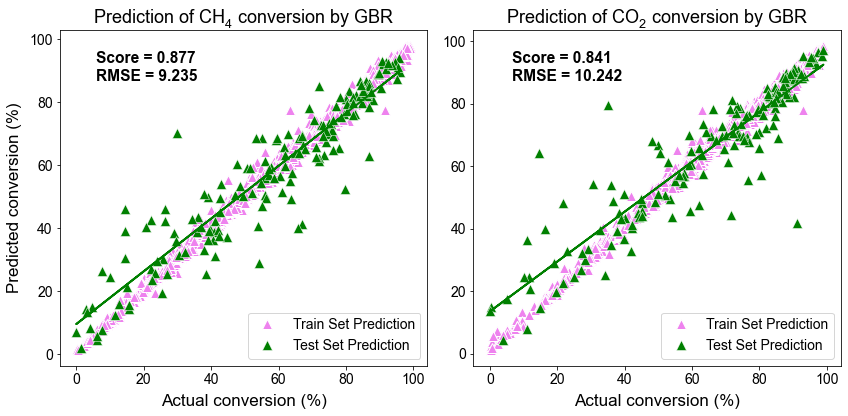

                Catalyst  Ratio of CH4 in Feed  Reaction Temperature  \
0            Ni−SiO2‑550                  0.15                 650.0   
1            Ni−SiO2‑750                  0.15                 650.0   
2      Ni/Sn0.2−SiO2‑550                  0.15                 650.0   
3      Ni/Sn0.2−SiO2‑750                  0.15                 650.0   
4     Ni/Sn0.05−SiO2‑550                  0.15                 650.0   
...                  ...                   ...                   ...   
1709              Ni-IMP                  0.50                 750.0   
1710            Ni/CZ100                  0.50                 700.0   
1711             Ni/CZ75                  0.50                 700.0   
1712             Ni/CZ44                  0.50                 700.0   
1713             Ni/CZ28                  0.50                 700.0   

      Ni Loading  Reaction Time  Pore Size  Pore Volume  Surface Area  \
0          10.00            0.5        4.7         0.58       

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


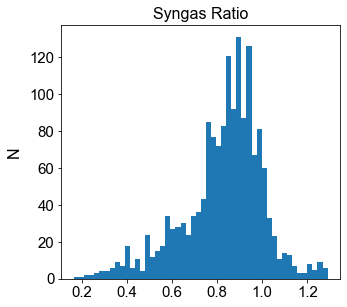

1620


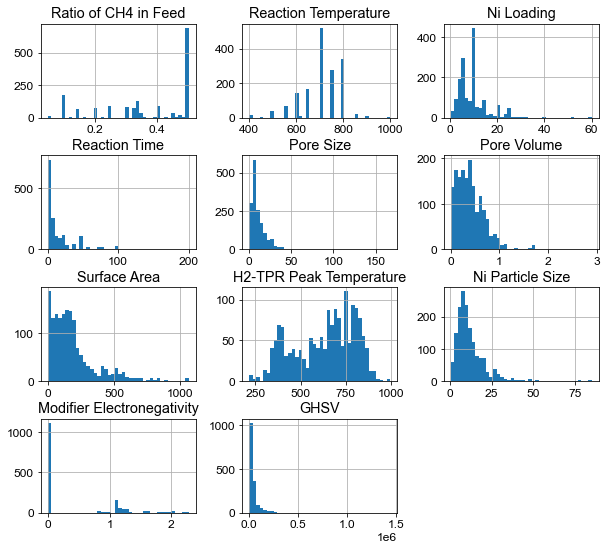

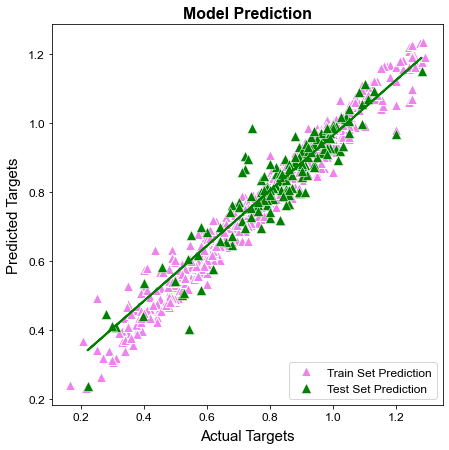

[0.06405719039516991, 0.8650468231769352]


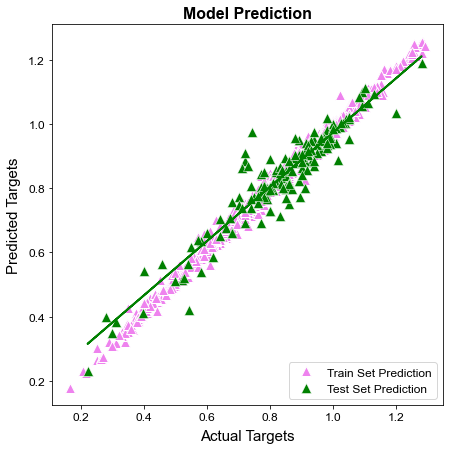

[0.05731972399140751, 0.8919423493674397]


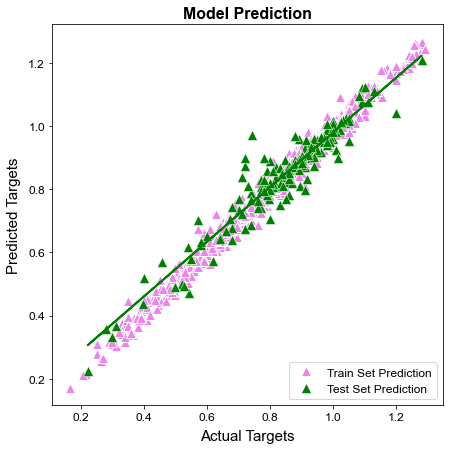

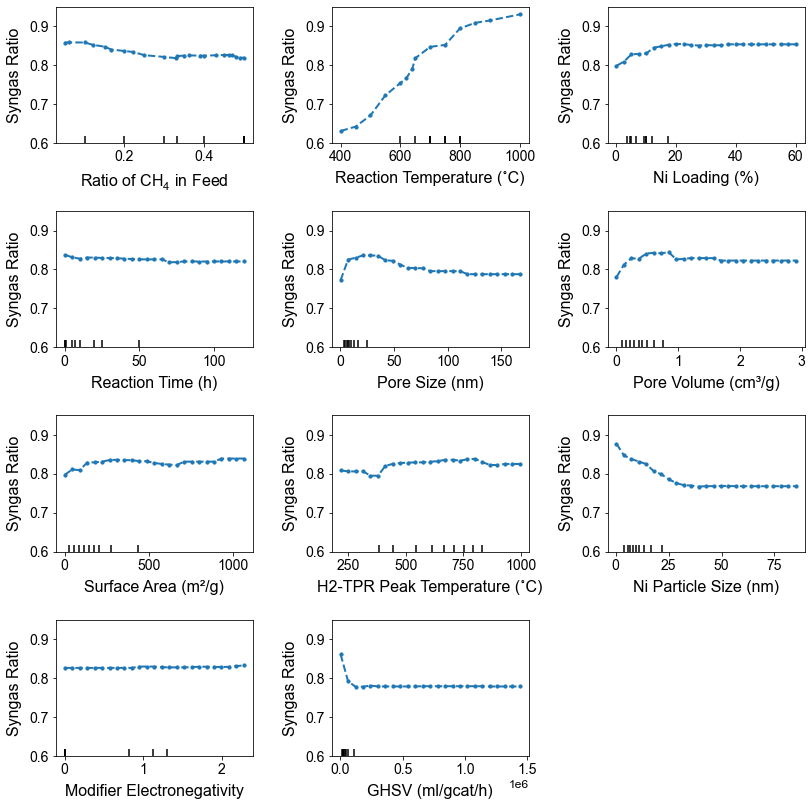

Time taken for one way pdp is 2.72 seconds


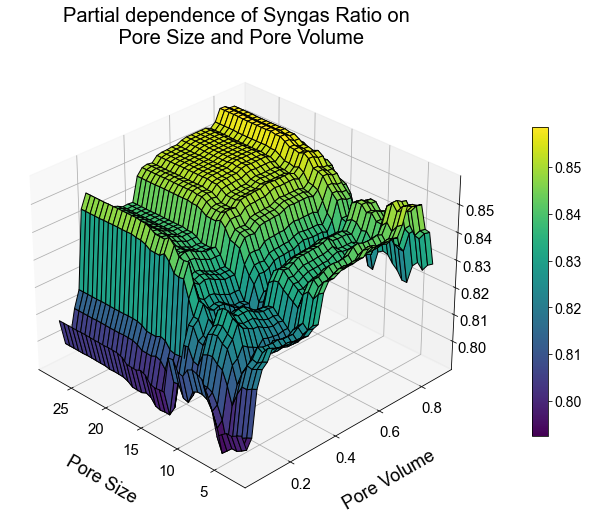

Time taken for 1st two way pdp is 14.38 seconds


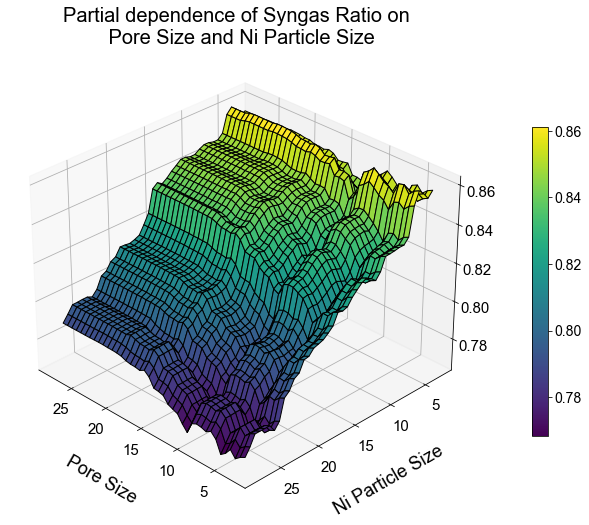

Time taken for 1st two way pdp is 14.43 seconds


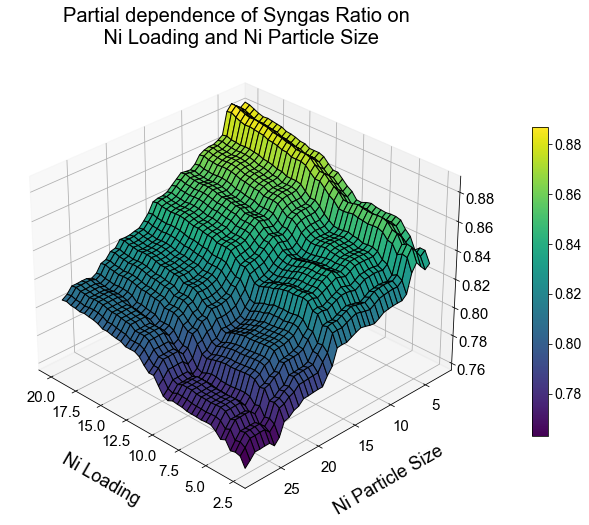

Time taken for 1st two way pdp is 15.08 seconds


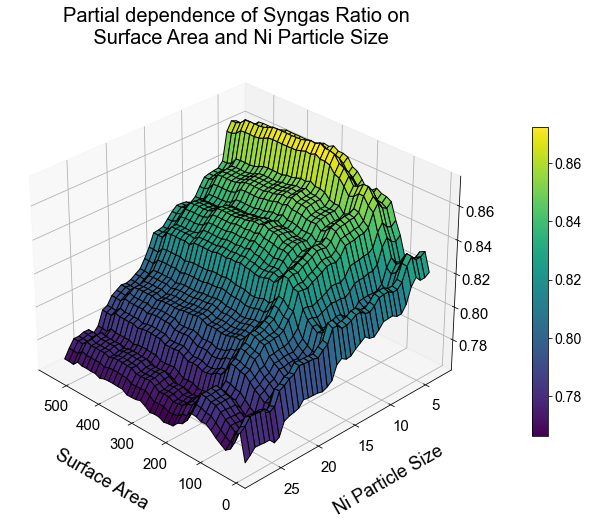

Time taken for 1st two way pdp is 16.62 seconds


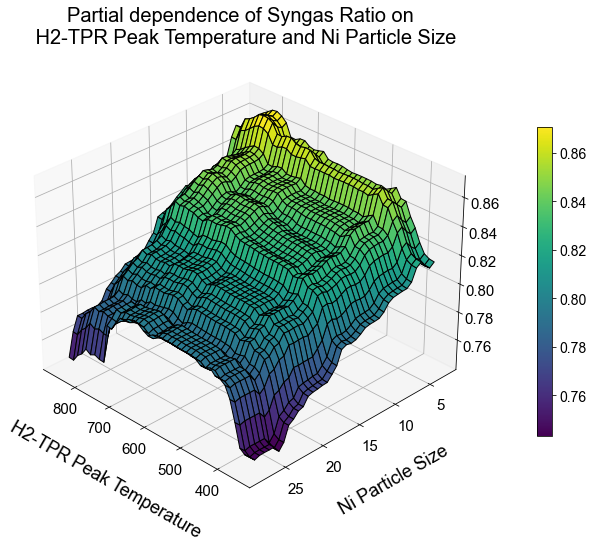

Time taken for 1st two way pdp is 22.99 seconds


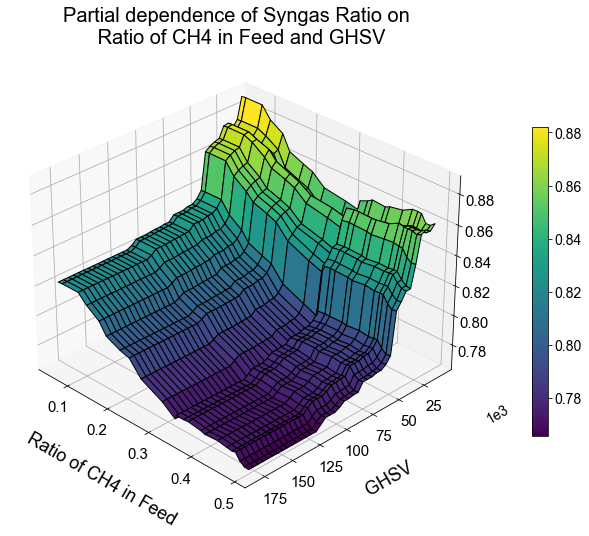

Time taken for 1st two way pdp is 11.36 seconds


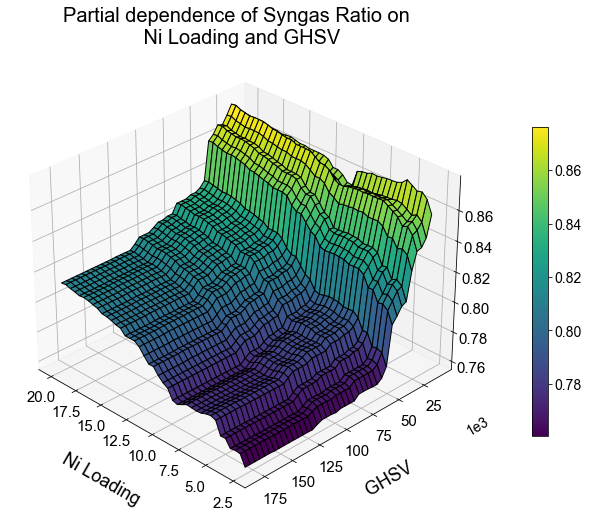

Time taken for 1st two way pdp is 19.51 seconds


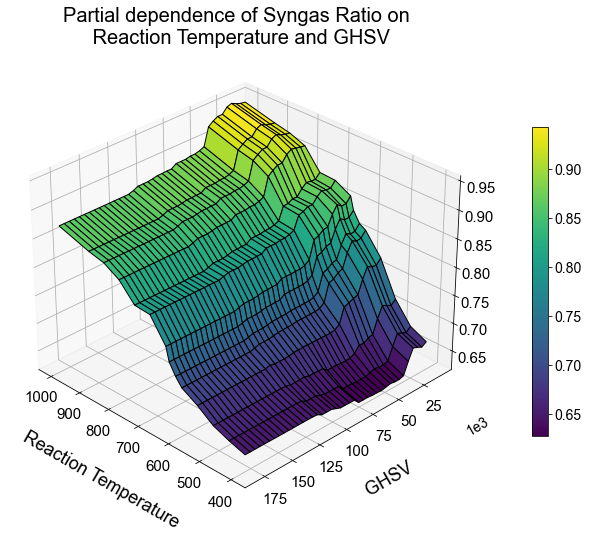

Time taken for 1st two way pdp is 7.84 seconds


FixedFormatter should only be used together with FixedLocator


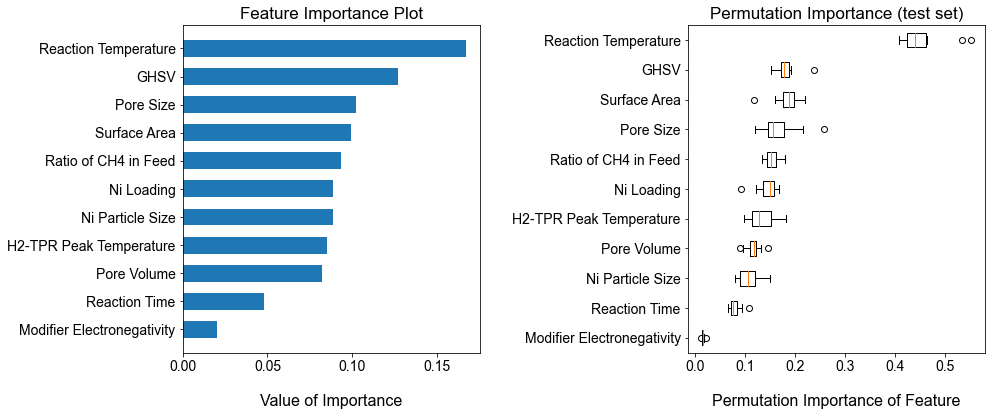

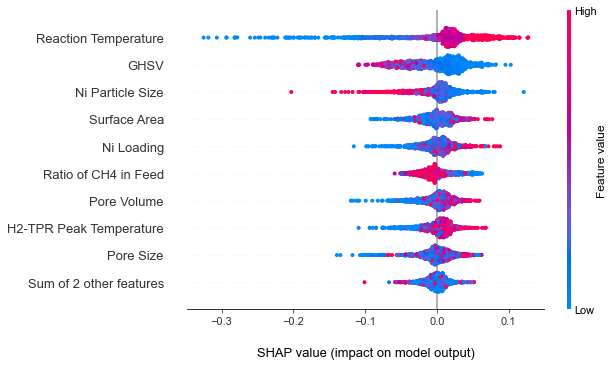

[0.052731064074068926, 0.9085506947806166]


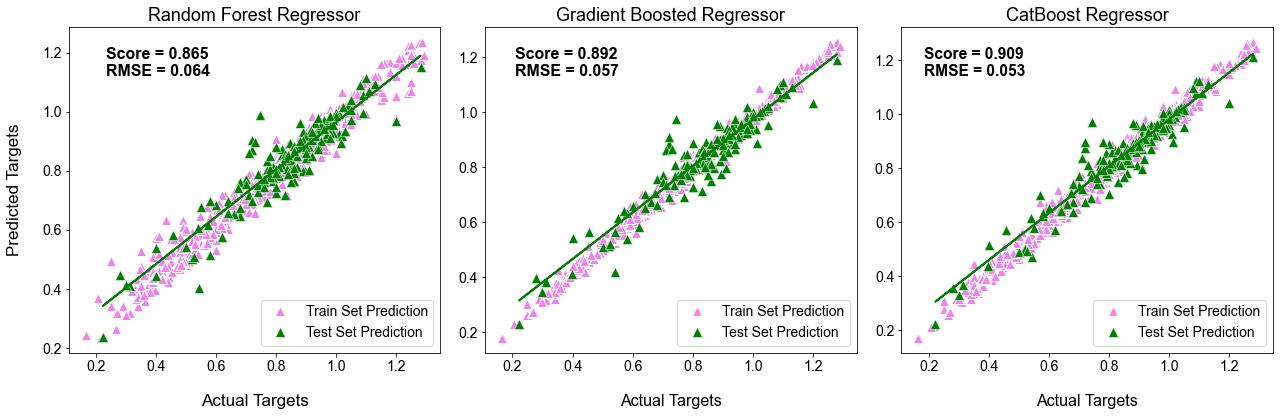

In [2]:
import numpy as np
import pandas as pd
import time as time
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.inspection import partial_dependence
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

%run CatalysisML_Final_Conversion.ipynb
%run CatalysisML_Final_Syngas.ipynb

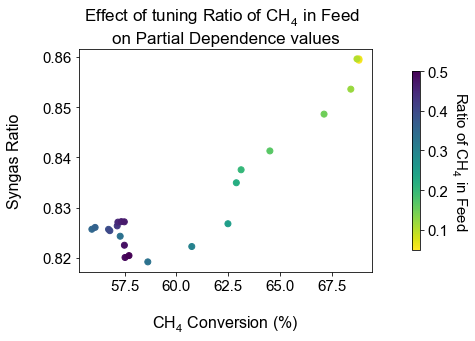

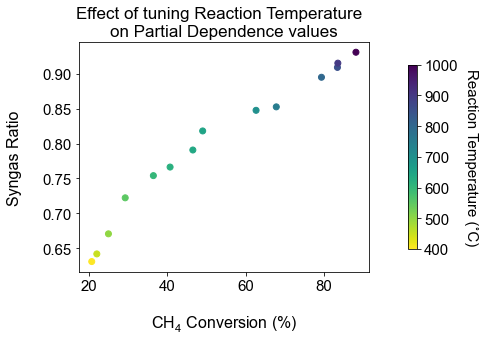

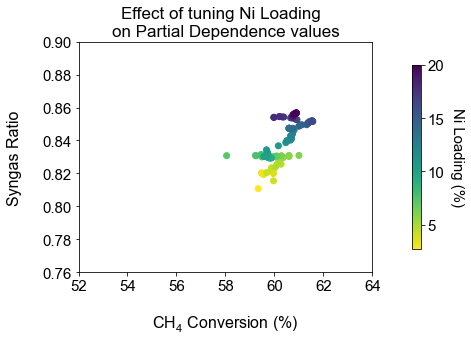

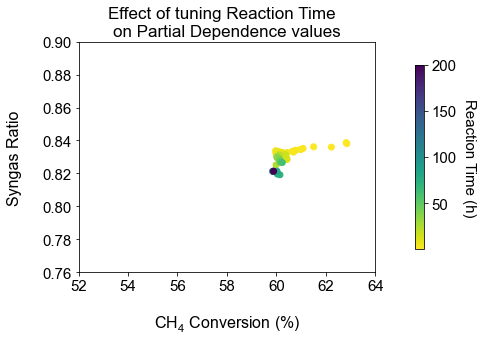

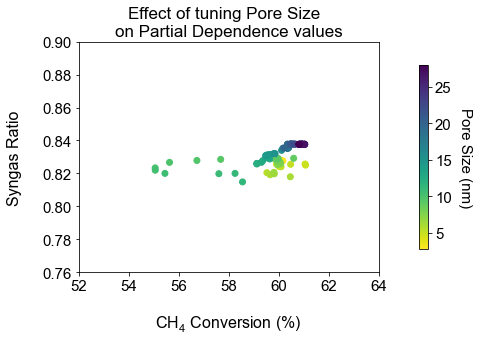

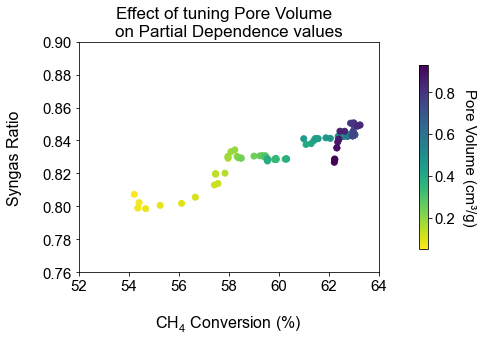

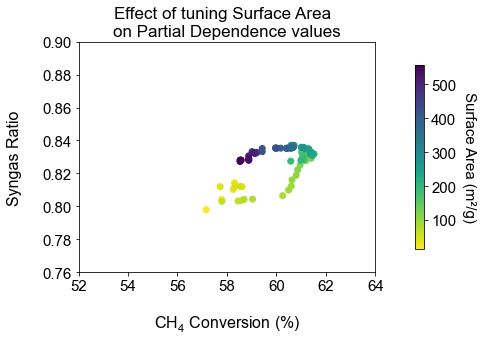

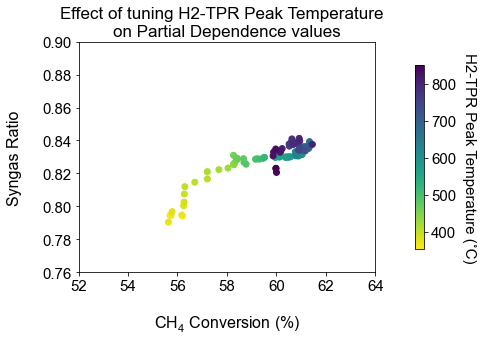

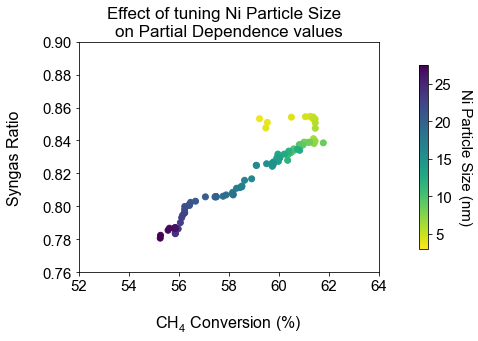

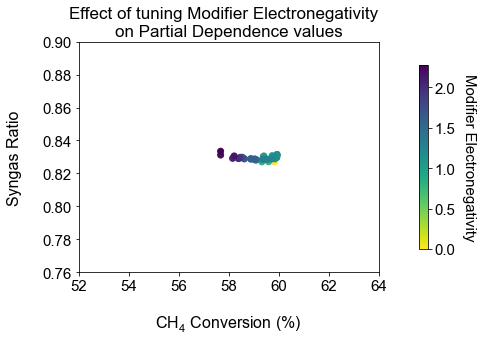

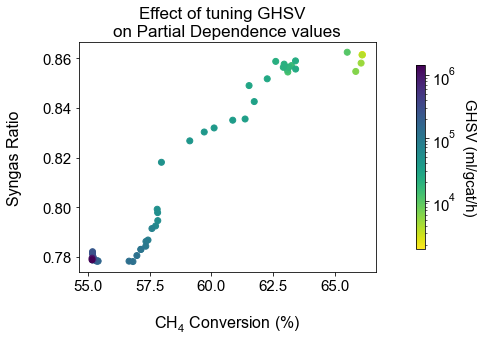

In [3]:
def plt2DFeatureTrajectory(dataset2, feature, featureName, color_gradient, ftype, isGHSV=False):
    ch4Conv, syngasRatio= dataset2
    titlesize = 17
    ticksize = 13
    labelsize = 16
    plt.rc('font', size=15)
    plt.rcParams['axes.labelpad'] = 20
    fig = plt.figure(figsize=(7,5))
    ax = plt.axes()
    y = np.array(syngasRatio)
    x = np.array(ch4Conv)
    c = color_gradient
    #plt.plot(x,y, "--")
    if isGHSV:
        sc = plt.scatter(x, y, c = c, cmap="viridis_r", norm = matplotlib.colors.LogNorm())
    else:
        sc = plt.scatter(x, y, c = c, cmap="viridis_r")
    ax.set_xlabel('${CH_4}$ Conversion (%)' ,fontsize=labelsize)
    #ax.set_xlabel('${CO_2}$ Conversion (%)' ,fontsize=labelsize)
    if ftype == "processParameter":
        pass
    else:
        ax.set_ylim(0.76,0.90)
        ax.set_xlim(52,64) # For CH4 conversion
        #ax.set_xlim(60,72) # For CO2 conversion
     #buffer = (max(y)-min(y))*0.05
    #ax.set_ylim(min(y)+buffer, max(y)+buffer)
    ax.set_ylabel('Syngas Ratio',  fontsize=labelsize)
    cm = plt.colorbar(sc, shrink=0.8, pad=0.1)
    cm.ax.set_ylabel(f'{featureName}', rotation=270)
    plt.title(f'Effect of tuning {feature}  \non Partial Dependence values',fontsize = titlesize)
    plt.tight_layout()
    plt.show()

def pltTrajectory(models, Xdf, bd = 0.05):
    mdlX, mdlY, mdlZ = models # unpack cd4mdl, co2mdl and syngasmdl for cat
    dfCopy = Xdf
    featureNames = ["Ratio of ${CH_4}$ in Feed", "Reaction Temperature", "Ni Loading","Reaction Time","Pore Size","Pore Volume","Surface Area","H2-TPR Peak Temperature", "Ni Particle Size", "Modifier Electronegativity","GHSV"]
    step = 1000
    low, high = (bd,1-bd)
    unitLst = ["Ratio of ${CH_4}$ in Feed", "Reaction Temperature (˚C)", "Ni Loading (%)","Reaction Time (h)","Pore Size (nm)","Pore Volume (cm³/g)","Surface Area (m²/g)","H2-TPR Peak Temperature (˚C)", "Ni Particle Size (nm)", "Modifier Electronegativity","GHSV (ml/gcat/h)"]
    for idx, feature in enumerate(unitLst):
        ch4conv = partial_dependence(mdlX, features=[idx], X=Xdf, percentiles=(low, high),grid_resolution=100)
        syngas = partial_dependence(mdlZ, features=[idx], X=Xdf, percentiles=(low, high),grid_resolution=100)
        colorG = syngas["values"] # or syngas
        #plt3DFeatureTrajectory((ch4conv,co2conv,syngas),feature, colorG)"
        if (idx in [0,1,10]):
            featureType = "processParameter"
            if idx == 10:
                plt2DFeatureTrajectory((ch4conv["average"],syngas["average"]),featureNames[idx], feature, colorG, featureType, isGHSV=True)
                break
        else:
            featureType = "catalysProperties"
        plt2DFeatureTrajectory((ch4conv["average"],syngas["average"]), featureNames[idx],feature, colorG, featureType)

feature_names = list(df.columns[2:13])
pltTrajectory((ch4mdl, co2mdl, syngasMdl), df.iloc[:,2:13])